# Analyzing Movie Reviews

## Data description

The dataset is stored in the fandango_score_comparison.csv file. It contains information on how major movie review services rated movies. The data originally came from https://fivethirtyeight.com/features/fandango-movies-ratings/.

Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

* RottenTomatoes - 0-100, in increments of 1.
* Metacritic - 0-100, in increments of 1.
* IMDB - 0-10, in increments of .1.
* Fandango - 0-5, in increments of .5.

Here are descriptions of some of the relevant columns in the dataset:

* FILM -- the name of the movie.
* RottenTomatoes -- the RottenTomatoes (RT) critic score.
* RottenTomatoes_User -- the RT user score.
* Metacritic -- the Metacritic critic score.
* Metacritic_User -- the Metacritic user score.
* IMDB -- the IMDB score given to the movie.
* Fandango_Stars -- the number of stars Fandango gave the movie.

To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. For example, RT_norm takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix _round is the rounded version of another column. For example, RT_user_norm_round rounds the RT_user_norm column to the nearest .5.

## Reading in and exploring the dataset

In [31]:
import pandas as pd

In [32]:
movie_reviews = pd.read_csv('fandango_score_comparison.csv')

In [33]:
print(movie_reviews.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

In [34]:
movie_reviews.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

## Comparing Fandango and Metacritic ratings

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

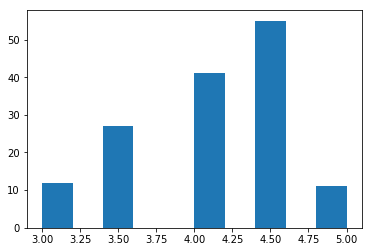

In [36]:
plt.hist(movie_reviews['Fandango_Stars'])
plt.show()

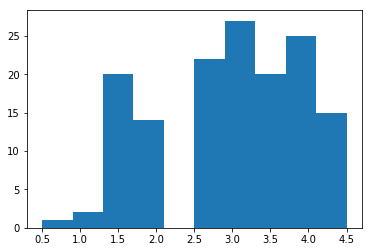

In [37]:
plt.hist(movie_reviews['Metacritic_norm_round'])
plt.show()

### Observations

Fandango Stars rating distribution is in more discrete chunks in comparison to the Metacritic normalized rounded critic ratings. This I believe is the result of rounding up the ratings instead of rounding to the closest value. All of Fandango's ratings are above 3, whereas a significant portion of Metacritic's rating are below 3, ~30% - 40%. Significant portion of Fandango's ratings are above 4, ~60% -70%, whereas a very small portion of Metacritic's rating are above 4, ~20%. Fandango's distribution is relatively more negatively skewed than Metacritic's. It seems like Fandango's reviews are biased, in general their ratings are relatively higher than Metacritic's.   

In [38]:
movie_reviews['Fandango_Stars'].describe()

count    146.000000
mean       4.089041
std        0.540386
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [39]:
movie_reviews['Metacritic_norm_round'].describe()

count    146.000000
mean       2.972603
std        0.990961
min        0.500000
25%        2.125000
50%        3.000000
75%        4.000000
max        4.500000
Name: Metacritic_norm_round, dtype: float64

### Observations

Mean - Fandango's is ~33% higher than Metacritic's

Standard deviation - Fandango's is ~50% of Metacritic's, suggesting much less spread or variation

Median - Fandango's is ~33% higher than Metacritic's, same as mean

It is also interesting to note that Fandango's median is higher than it's mean, indicating that there are a larger number of higher values. It's the other way around for Metacritic's ratings.

## Analyzing correlation between Fandango and Metacritic ratings

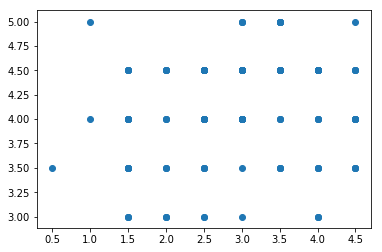

In [40]:
plt.scatter(movie_reviews['Metacritic_norm_round'], movie_reviews['Fandango_Stars'])
plt.show()

In [41]:
import numpy as np

In [42]:
movie_reviews['fm_diff'] = np.absolute(movie_reviews['Metacritic_norm_round'] - movie_reviews['Fandango_Stars'])
movie_reviews = movie_reviews.sort('fm_diff', ascending = False)
print(movie_reviews.head(5))

                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

/Users/jeganram/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [43]:
from scipy.stats import pearsonr
from scipy.stats import linregress

In [44]:
[r, p] = pearsonr(movie_reviews['Metacritic_norm_round'], movie_reviews['Fandango_Stars'])
r

0.17844919073895918

### Observations

Pearson r correlation coefficient above is low, this means there is a weak or no correlation between the Fandango and Metacritic ratings. We would expect the correlation to be medium to very strong and positive, as Metacritic's rating increases or decreases so does Fandango's, but that's not the case here.

## Predicting Fandango rating from Metacritic's

In [45]:
[m, b, r, p, std_err] = linregress(movie_reviews['Metacritic_norm_round'], movie_reviews['Fandango_Stars'])
[m, b, r, p, std_err]

[0.09731107797392835,
 3.7997739188994188,
 0.17844919073895896,
 0.031161516228524269,
 0.044713544656798297]

In [46]:
m*3 + b

4.0917071528212041

In [47]:
mt = np.array([1.0, 5.0])
fg = m*mt + b
fg

array([ 3.897085  ,  4.28632931])

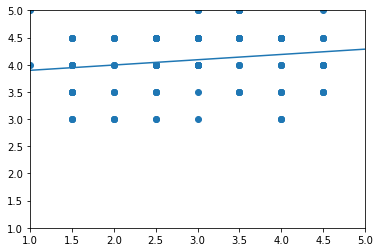

In [48]:
plt.scatter(movie_reviews['Metacritic_norm_round'], movie_reviews['Fandango_Stars'])
plt.plot(mt, fg)
plt.xlim(1.0,5.0)
plt.ylim(1.0,5.0)
plt.show()

## Potential next steps

Explore the other rating services, IMDB and RottenTomatoes.
See how they differ from each other.
See how they differ from Fandango.
See how user scores differ from critic scores.
Acquire more recent review data, and see if the pattern of Fandango inflating reviews persists.
Dig more into why certain movies had their scores inflated more than others.